# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [13]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe **   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


In [14]:
# The residual is the difference between the observed value and the 
# estimated value of the quantity of interest (for example, a sample mean)

# gererowanie macierzy m = 10 ,20 ,50 ,100 ,1000 
from main import random_matrix_Ab

A10 , b10  = random_matrix_Ab(10)
A20, b20 = random_matrix_Ab(20)
A50, b50 = random_matrix_Ab(50)
A100 , b100 = random_matrix_Ab(100)
A1000 , b1000 = random_matrix_Ab(1000)

print("Macierz A: " , A10)
print("Wektor b: ", b10)

Macierz A:  [[4 4 1 9 0 1 2 9 5 4]
 [2 6 1 9 3 2 9 5 7 4]
 [9 8 1 4 1 9 7 2 1 2]
 [8 2 5 7 9 8 9 2 7 4]
 [0 4 5 8 7 9 2 1 9 7]
 [2 3 8 7 7 7 9 0 5 7]
 [8 4 4 1 4 1 7 7 1 8]
 [4 0 7 1 5 3 5 4 7 9]
 [8 7 1 7 3 8 2 0 9 6]
 [4 8 8 1 0 9 8 0 4 7]]
Wektor b:  [5 2 5 1 9 4 5 1 7 0]


***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

In [15]:
from main import residual_norm


#Wskaźnik uwarunkowania określa, w jakim stopniu błąd reprezentacji numerycznej danych wejściowych danego problemu wpływa na błąd wyniku.
#Wskaźnik uwarunkowania definiuje się jako maksymalny stosunek błędu względnego rozwiązania do błędu względnego danych. 
#Problem o niskim wskaźniku uwarunkowania nazywamy dobrze uwarunkowanym, zaś problemy o wysokim wskaźniku uwarunkowania – źle uwarunkowanymi.

#Rozwiązuje układ rownan metoda solve
#1
x10 = np.linalg.solve(A10, b10)
print(x10)
x20 = np.linalg.solve(A20, b20)
x50 = np.linalg.solve(A50, b50)
x100 = np.linalg.solve(A100, b100)
x1000 = np.linalg.solve(A1000, b1000)
#2
# Najpierw obliczyliśmy x za pomocą solve , teraz przesyłamy nasze wartości do naszej funkcji i sprawdzamy ile to się będzie różnić
print( "\nDokładneść rozwiązania 10: " ,residual_norm(A10,x10,b10))
print( "Dokładneść rozwiązania 20: " ,residual_norm(A20,x20,b20))
print( "Dokładneść rozwiązania 50: " ,residual_norm(A50,x50,b50))
print( "Dokładneść rozwiązania 100: " ,residual_norm(A100,x100,b100))
print( "Dokładneść rozwiązania 1000: " ,residual_norm(A1000,x1000,b1000))

#3 Liczę uwarunkowanie mojej funkcji 
print("Uwarunkowanie dla 10: " , np.linalg.cond(A10))
print("Uwarunkowanie dla 20: " , np.linalg.cond(A20))
print("Uwarunkowanie dla 50: " , np.linalg.cond(A50))
print("Uwarunkowanie dla 100: " , np.linalg.cond(A100))
print("Uwarunkowanie dla 1000: " , np.linalg.cond(A1000))

#Im wieksza macierz tym moze być większy bład i wieksze uwarunkowanie  

#5 Czas wykonania oblcizen 
print('SIZE: 10 ')
print('Timing: ')
saved_timing = %timeit -r 5 -n 10 -o residual_norm(A10,x10,b10)
saved_timing.average   
saved_timing.stdev     

print('SIZE: 50 ')
print('Timing: ')
saved_timing = %timeit -r 5 -n 10 -o residual_norm(A50,x50,b50)
saved_timing.average   
saved_timing.stdev     


print('SIZE: 100 ')
print('Timing: ')
saved_timing = %timeit -r 5 -n 10 -o residual_norm(A100,x100,b100)
saved_timing.average   
saved_timing.stdev     

print('SIZE: 1000 ')
print('Timing: ')
saved_timing = %timeit -r 5 -n 10 -o residual_norm(A1000,x1000,b1000)
saved_timing.average   
saved_timing.stdev  




[-0.29081003 -0.21900629 -1.31522366  0.59590063  0.25626245  0.85847329
 -0.32475971  0.1222945  -1.0041861   1.67567736]

Dokładneść rozwiązania 10:  5.102196573270515e-15
Dokładneść rozwiązania 20:  1.833717428750832e-14
Dokładneść rozwiązania 50:  8.600782478056129e-14
Dokładneść rozwiązania 100:  7.761637690275392e-13
Dokładneść rozwiązania 1000:  2.2252503101778895e-10
Uwarunkowanie dla 10:  67.51135237549336
Uwarunkowanie dla 20:  135.42073472956088
Uwarunkowanie dla 50:  340.6634476517181
Uwarunkowanie dla 100:  23335.267655707292
Uwarunkowanie dla 1000:  189423.85780798818
SIZE: 10 
Timing: 
7.85 µs ± 1.47 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE: 50 
Timing: 
18.1 µs ± 8.39 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE: 100 
Timing: 
52.8 µs ± 5.99 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
SIZE: 1000 
Timing: 
2.35 ms ± 70.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


7.069807532750779e-05

4 . Im więcej elementów maceirzy tym większe uwarunkowanie 

***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [16]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
# Macierze U oraz V są ortogonalne czyli transpozycja = odwrotnosc
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [17]:
S1 = np.logspace(100, 1, num=3)
print(S1)



[1.00000000e+100 3.16227766e+050 1.00000000e+001]


- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [18]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100
print(S2)

[1.00000000e+100 3.16227766e+050 1.00000000e+001]


- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [19]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100
print(S3)

[1.00000000e+100 3.16227766e+050 1.00000000e+100]




W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [20]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A)

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[-4.02045290e+99  3.94198798e+99  5.91298198e+99]
 [ 9.14289726e+99  1.91685719e+99  2.87528579e+99]
 [-4.93343857e+98  3.39935582e+99  5.09903374e+99]]


In [21]:
from main import order_sing_value


#2 dla log_sing

#najpierw dla zadanych m wywołuje funkcje liczącą sing_value logarytmowana
sin10 = (main.log_sing_value(10,1,100))
sin20 = (main.log_sing_value(20,1,100))
sin50 = (main.log_sing_value(50,1,100))
sin100 = (main.log_sing_value(100,1,100))
sin1000 = (main.log_sing_value(1000,1,100))
#tutaj tworze sobie macierze na podstawie mojej singular value
A10s = main.create_matrix_from_A(A10,sin10)
A20s = main.create_matrix_from_A(A20,sin20)
A50s = main.create_matrix_from_A(A50,sin50)
A100s = main.create_matrix_from_A(A100,sin100)
A1000s = main.create_matrix_from_A(A1000,sin1000)

#3 dla log_sing 

#Liczone jest uwarunkowanie dla wygerowanych moich macierzy 

print("Uwarunkowanie dla 10: " , np.linalg.cond(A10s))
print("Uwarunkowanie dla 20: " , np.linalg.cond(A20s))
print("Uwarunkowanie dla 50: " , np.linalg.cond(A50s))
print("Uwarunkowanie dla 100: " , np.linalg.cond(A100s))
print("Uwarunkowanie dla 1000: " , np.linalg.cond(A1000s))

#2 dla high - funkcja order_sing_value z przesyłanym gre 

sin10h = (order_sing_value(10,site = 'gre'))
sin20h = (order_sing_value(20,site='gre'))
sin50h = (order_sing_value(50,site='gre'))
sin100h = (order_sing_value(100,site='gre'))
sin1000h = (order_sing_value(1000,site='gre'))

A10sh = main.create_matrix_from_A(A10,sin10h)
A20sh = main.create_matrix_from_A(A20,sin20h)
A50sh = main.create_matrix_from_A(A50,sin50h)
A100sh = main.create_matrix_from_A(A100,sin100h)
A1000sh = main.create_matrix_from_A(A1000,sin1000h)

#3 dla high 
print("Uwarunkowanie dla 10 gre : " , np.linalg.cond(A10sh))
print("Uwarunkowanie dla 20 gre : " , np.linalg.cond(A20sh))
print("Uwarunkowanie dla 50 gre : " , np.linalg.cond(A50sh))
print("Uwarunkowanie dla 100 gre : " , np.linalg.cond(A100sh))
print("Uwarunkowanie dla 1000 gre : " , np.linalg.cond(A1000sh))

#2 dla low 

#dla przesylanego site = 'low'

sin10l = (main.order_sing_value(10,site='low'))
sin20l = (main.order_sing_value(20,site='low'))
sin50l = (main.order_sing_value(50,site='low'))
sin100l = (main.order_sing_value(100,site='low'))
sin1000l = (main.order_sing_value(1000,site='low'))

A10sl = main.create_matrix_from_A(A10,sin10l)
A20sl = main.create_matrix_from_A(A20,sin20l)
A50sl = main.create_matrix_from_A(A50,sin50l)
A100sl = main.create_matrix_from_A(A100,sin100l)
A1000sl = main.create_matrix_from_A(A1000,sin1000l)

#3 Uwarunkowanie dla low 
print("Uwarunkowanie dla 10 low: " , np.linalg.cond(A10sl))
print("Uwarunkowanie dla 20 low: " , np.linalg.cond(A20sl))
print("Uwarunkowanie dla 50 low: " , np.linalg.cond(A50sl))
print("Uwarunkowanie dla 100 low: " , np.linalg.cond(A100sl))
print("Uwarunkowanie dla 1000 low: " , np.linalg.cond(A1000sl))









Uwarunkowanie dla 10:  6.728035689080889e+18
Uwarunkowanie dla 20:  7.975007281691566e+19
Uwarunkowanie dla 50:  7.692628490551809e+19
Uwarunkowanie dla 100:  5.913401835090925e+19
Uwarunkowanie dla 1000:  6.87171770067196e+19
Uwarunkowanie dla 10 gre :  37.302400464735456
Uwarunkowanie dla 20 gre :  290.0495655338046
Uwarunkowanie dla 50 gre :  171.91537747116143
Uwarunkowanie dla 100 gre :  1948.9718288286608
Uwarunkowanie dla 1000 gre :  11064.366523990193
Uwarunkowanie dla 10 low:  59.257177764857836
Uwarunkowanie dla 20 low:  97.12016604743144
Uwarunkowanie dla 50 low:  256.47045469740425
Uwarunkowanie dla 100 low:  314.20985797032336
Uwarunkowanie dla 1000 low:  7989.1206873493475




3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




4 . Czy jest konieczne? 
Nie jest konieczne, ponieważ mamy wartości singularne. Stosunek wartości singularnych jest taki sam jak stosunek uwarunkowania. 




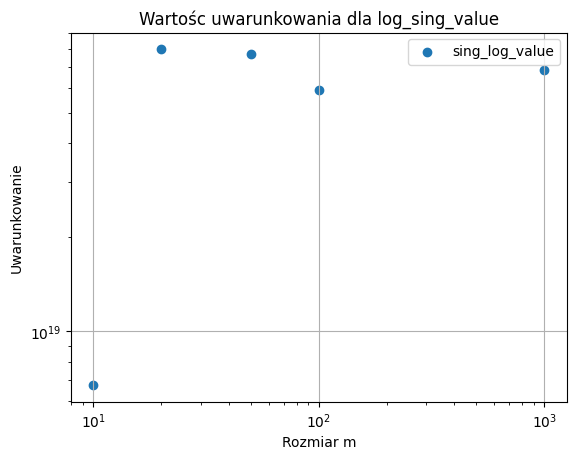

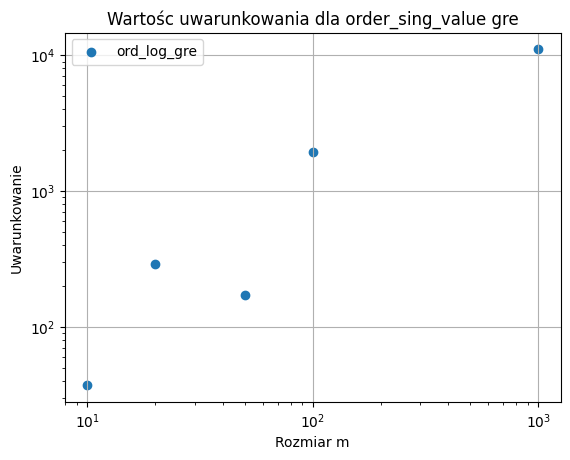

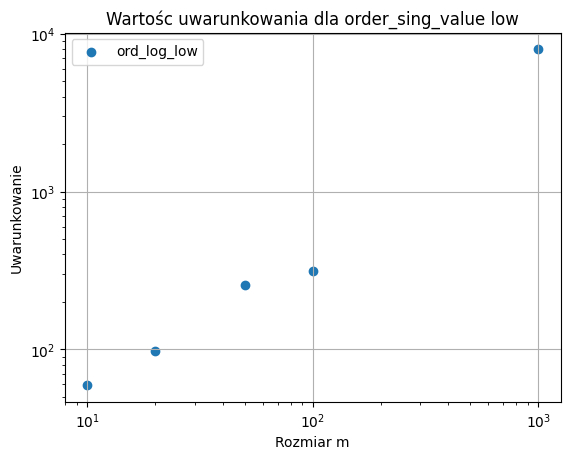

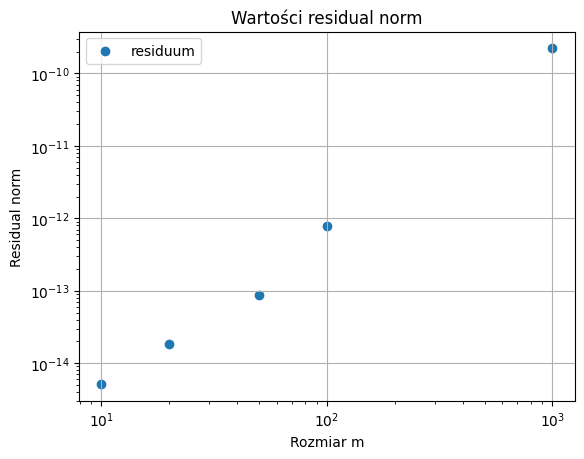

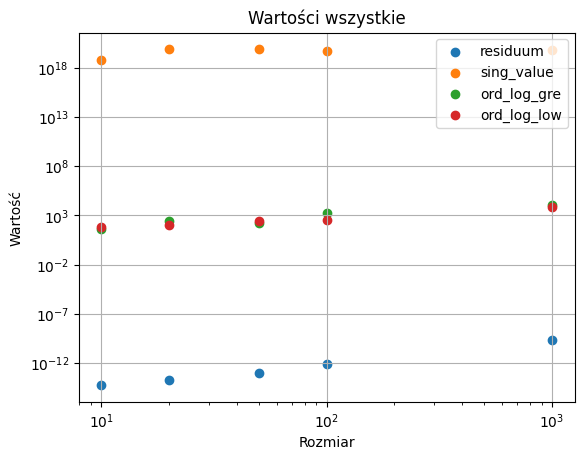

In [24]:
#5 

m = [10, 20, 50, 100, 1000]

#na podstawie wyzszych obliczen ktore dotyczyly uwarunkowania dla macierzy uzywajacej mojej funkcji sing_log i create_A
# tak aby można było przedstawić to na wykresie to stworzyłem liste tych uwarynkowań 
# dla każdego z przypadkow , zwykly , high , low  

#dla przypadku zwykłego 
sing_log = [np.linalg.cond(A10s) , np.linalg.cond(A20s), np.linalg.cond(A50s), np.linalg.cond(A100s), np.linalg.cond(A1000s)]

#dla przypadku z wartoscia gre 
ord_log_gre = [np.linalg.cond(A10sh), np.linalg.cond(A20sh), np.linalg.cond(A50sh),np.linalg.cond(A100sh) ,np.linalg.cond(A1000sh)]

#dla przypadku z wartosia low
ord_log_l = [np.linalg.cond(A10sl) , np.linalg.cond(A20sl) ,np.linalg.cond(A50sl) , np.linalg.cond(A100sl) , np.linalg.cond(A1000sl)]


plt.scatter(m, sing_log,label='sing_log_value')
plt.title("Wartośc uwarunkowania dla log_sing_value")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rozmiar m")
plt.ylabel("Uwarunkowanie")
plt.legend()
plt.grid()
plt.show()

plt.scatter(m, ord_log_gre,label = 'ord_log_gre')
plt.title("Wartośc uwarunkowania dla order_sing_value gre")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rozmiar m")
plt.ylabel("Uwarunkowanie")
plt.legend()
plt.grid()
plt.show()

plt.scatter(m, ord_log_l,label = 'ord_log_low')
plt.title("Wartośc uwarunkowania dla order_sing_value low")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rozmiar m")
plt.ylabel("Uwarunkowanie")
plt.legend()
plt.grid()
plt.show()

#na podstawie zadania 1 
#tam tworzyłem macierze A i wektory b 
#nastepnie funkcja solve byly rozwiazywane dla x 
#wiec teraz pozna to ustawic w liste jako wywolanie funkcji residual_norm() z tymi argumentami 
res1 = [residual_norm(A10,x10,b10),residual_norm(A20,x20,b20),residual_norm(A50,x50,b50),residual_norm(A100,x100,b100),residual_norm(A1000,x1000,b1000)]

#wykres dla norm residuum 
plt.scatter(m, res1,label = 'residuum')
plt.title("Wartości residual norm")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rozmiar m")
plt.ylabel("Residual norm")
plt.legend()
plt.grid()
plt.show()


# wyniki dla wszsytkich parametrów 
plt.scatter(m,res1,label = 'residuum')
plt.title("Wartości wszystkie")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rozmiar")
plt.ylabel("Wartość")
plt.grid()
plt.scatter(m,sing_log,label = 'sing_value') #pomaranczowe 
plt.scatter(m,ord_log_gre , label = 'ord_log_gre') #zielony 
plt.scatter(m,ord_log_l, label = 'ord_log_low') #czerwony 
plt.legend()
plt.show()





Wnioski: 

Większość wniosków wyciągałem z każdego zadania co umieszczałem w komentarzach nad nimi tak, aby było łatwiej mi zrozumieć co robię. Tutaj, więc jedynie opisuje ogólnie zadania.Pierwsza funkcja polegała jedynie na stworzeniu macierzy. Następnie ciekawym było się dowiedzieć co to jest norma residuu, dzięki temu że porównaywaliśmy wyniki z funkcją solve to udało się sprawdzić wyniki. Następnie był rozkład na wartości singularne, który w przyszłości może okazać się kluczowy. Potem zostało pokazane, że można również obliczać uwarunkowania przy pomocy swoich funkcji. Na koniec wszsytkie wyniki zostały przedstawione na wykresie.   

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)